In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df=pd.read_csv('wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Conclusion

In columns ['residual sugar','free sulfur dioxide','total sulfur dioxide'] outliers maybe present.

# EDA

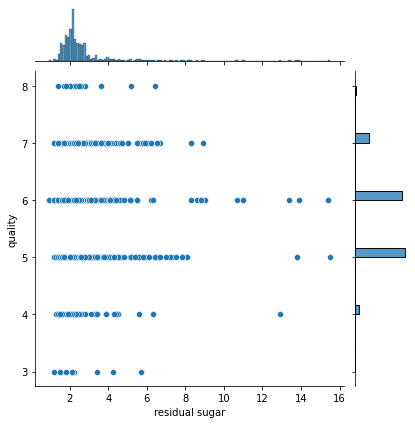

In [9]:
sns.jointplot(x='residual sugar', y='quality', data=df)

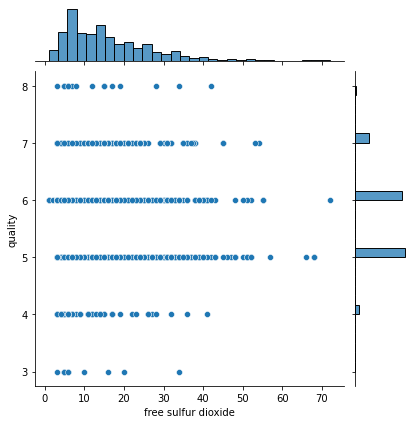

In [10]:
sns.jointplot(x='free sulfur dioxide', y='quality', data=df)

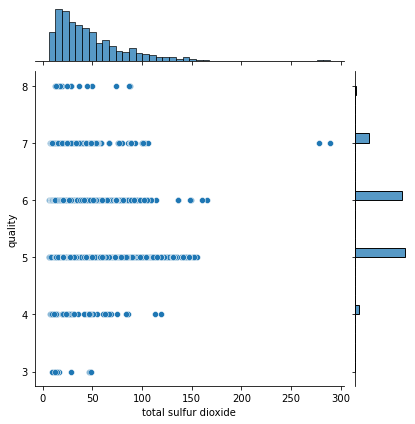

In [11]:
sns.jointplot(x='total sulfur dioxide', y='quality', data=df)

There are 2 outliers present in 'total sulfur dioxide'

In [13]:
UpperLimit = np.percentile(df['total sulfur dioxide'], [99])[0]
UpperLimit

145.0

In [14]:
df[(df['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [17]:
df[(df['total sulfur dioxide'] > UpperLimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [19]:
df.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.114374,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.080937,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.030744,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.195846,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.050188,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.673055,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.114374,0.080937,0.030744,0.195846,0.050188,0.673055,1.000000,0.077256,-0.062581,0.045862,-0.213432,-0.192365
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.077256,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.062581,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.045862,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:xlabel='quality', ylabel='count'>

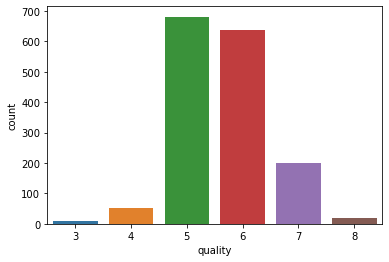

In [22]:
sns.countplot(x = 'quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

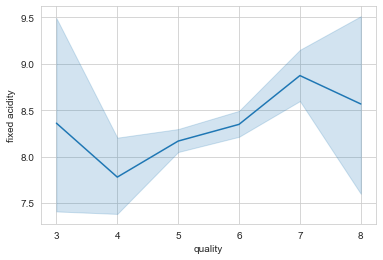

In [23]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

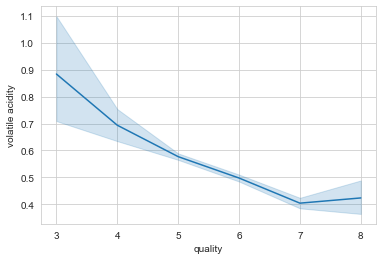

In [24]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="volatile acidity")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

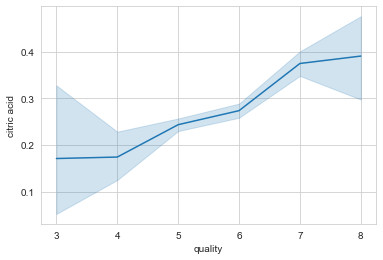

In [25]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="citric acid")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

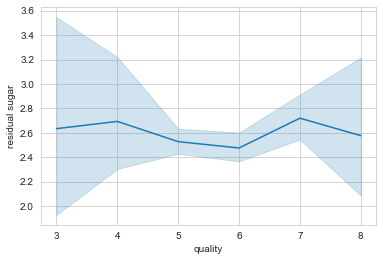

In [26]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="residual sugar")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

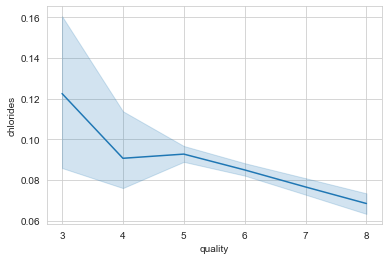

In [27]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="chlorides")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

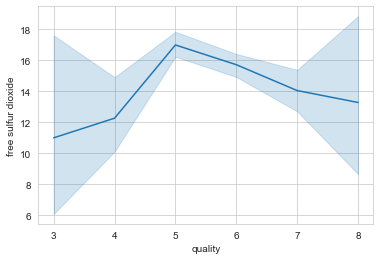

In [28]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="free sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

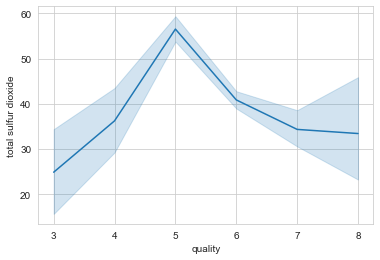

In [29]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="total sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='density'>

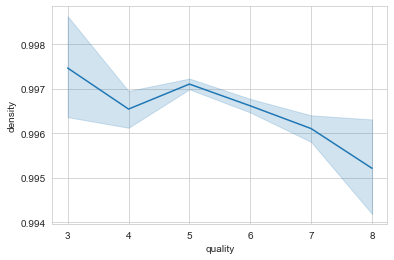

In [30]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="density")

<AxesSubplot:xlabel='quality', ylabel='pH'>

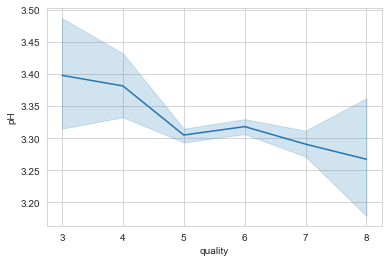

In [31]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="pH")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

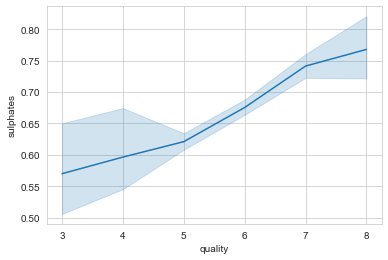

In [32]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="sulphates")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

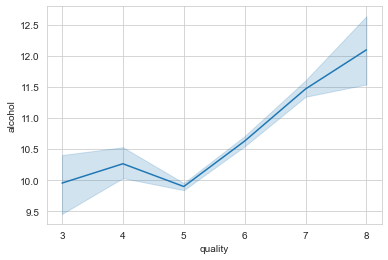

In [33]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="alcohol")

# Conclusion:

1. With the increase in quality score, the composition of chlorides and volatile acidity decreases.
2. With the increase in quality score, the compostion of alcohol, sulphates and citric acid increases.

In [34]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [35]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

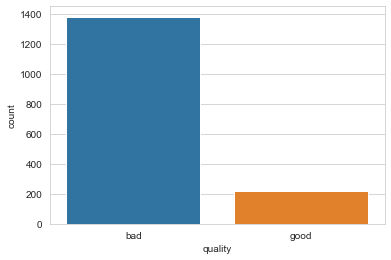

In [36]:
sns.countplot(x = 'quality', data=df)

In [38]:
labelencoder = LabelEncoder()
df['quality'] = labelencoder.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Spliting the dataset into train and test set

In [39]:
x = df.drop(['quality'], axis=1)
y = df['quality']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

# Here we'll use Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.7)
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7)

Acuracy of logistic regression for test set:  86.875
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       402
           1       0.76      0.28      0.41        78

    accuracy                           0.87       480
   macro avg       0.82      0.63      0.67       480
weighted avg       0.86      0.87      0.84       480

Confusion Matrix : 
 [[395   7]
 [ 56  22]]

Confusion Matrix heatmap : 


<AxesSubplot:>

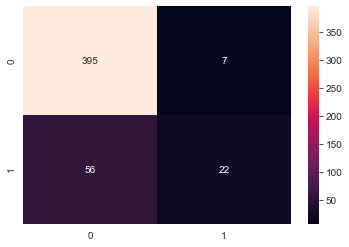

In [43]:
print("Acuracy of logistic regression for test set: ", accuracy_score(y_test, lr.predict(x_test))*100)
print('Classification Report : \n', classification_report(y_test, lr.predict(x_test)))
print("Confusion Matrix : \n", confusion_matrix(y_test, lr.predict(x_test)))
print('\nConfusion Matrix heatmap : ')
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt='d')

Acuracy of logistic regression for train set:  88.82931188561216

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       980
           1       0.67      0.20      0.31       139

    accuracy                           0.89      1119
   macro avg       0.78      0.59      0.62      1119
weighted avg       0.87      0.89      0.86      1119


Confusion Matrix for train set : 
 [[966  14]
 [111  28]]

Confusion Matrix Heatamp for train set: 


<AxesSubplot:>

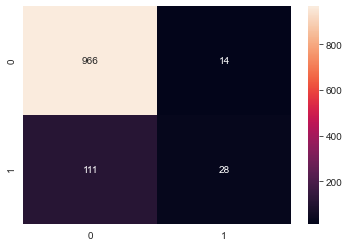

In [67]:
print("Acuracy of logistic regression for train set: ", accuracy_score(y_train, lr.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, lr.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, lr.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, lr.predict(x_train)), annot=True, fmt='d')

# Support Vector Machine

In [70]:
from sklearn.svm import SVC

In [71]:
kernals = ['rbf', 'poly', 'linear']

In [72]:
accuracy = []
for i in kernals:
    svm_classifier = SVC(C=1.7, kernel=i, random_state=5)
    svm_classifier.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, svm_classifier.predict(x_test))*100)

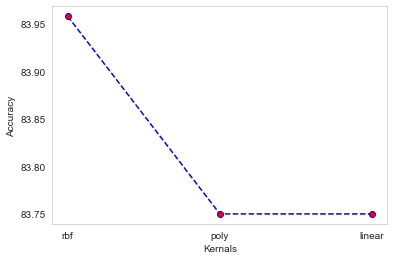

In [73]:
plt.plot(kernals, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('Kernals')
plt.ylabel('Accuracy')
plt.grid()

In [74]:
svm_classifier = SVC(C=1.7, kernel='rbf', random_state=5)
svm_classifier.fit(x_train, y_train)

SVC(C=1.7, random_state=5)


Acuracy of SVM classifier for test set:  83.95833333333333

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       402
           1       1.00      0.01      0.03        78

    accuracy                           0.84       480
   macro avg       0.92      0.51      0.47       480
weighted avg       0.87      0.84      0.77       480


Confusion Matrix for test case : 
 [[402   0]
 [ 77   1]]

Confusion Matrix Heatamp for test case: 


<AxesSubplot:>

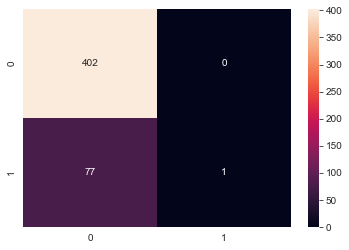

In [75]:
print("\nAcuracy of SVM classifier for test set: ", accuracy_score(y_test, svm_classifier.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, svm_classifier.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, svm_classifier.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, svm_classifier.predict(x_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  87.66756032171583

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       980
           1       1.00      0.01      0.01       139

    accuracy                           0.88      1119
   macro avg       0.94      0.50      0.47      1119
weighted avg       0.89      0.88      0.82      1119


Confusion Matrix for train set : 
 [[980   0]
 [138   1]]

Confusion Matrix Heatamp for train set: 


<AxesSubplot:>

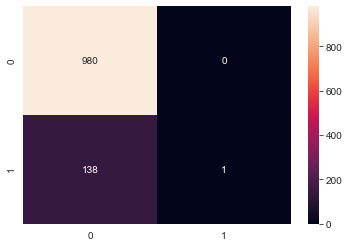

In [76]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, svm_classifier.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, svm_classifier.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, svm_classifier.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, svm_classifier.predict(x_train)), annot=True, fmt='d')

# K-Nearest Neighbour

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
neighbors = [i for i in range(1,21)]

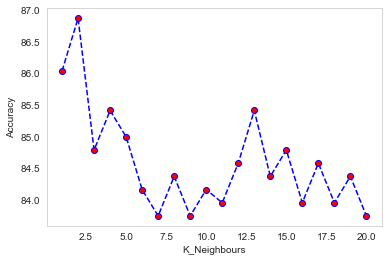

In [78]:
accuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k)
    Knn_classifier.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, Knn_classifier.predict(x_test))*100)

plt.plot(neighbors, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()

In [79]:
Knn_classifier = KNeighborsClassifier(n_neighbors=4)
Knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)


Acuracy of KNN classifier for test set:  85.41666666666666

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       402
           1       0.72      0.17      0.27        78

    accuracy                           0.85       480
   macro avg       0.79      0.58      0.59       480
weighted avg       0.84      0.85      0.81       480


Confusion Matrix for test case : 
 [[397   5]
 [ 65  13]]

Confusion Matrix Heatamp for test case: 


<AxesSubplot:>

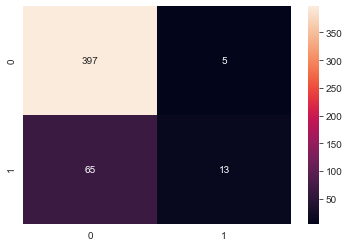

In [80]:
print("\nAcuracy of KNN classifier for test set: ", accuracy_score(y_test, Knn_classifier.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, Knn_classifier.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, Knn_classifier.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, Knn_classifier.predict(x_test)), annot=True, fmt='d')

Acuracy of KNN classifier for train set:  90.0804289544236

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       980
           1       0.89      0.23      0.37       139

    accuracy                           0.90      1119
   macro avg       0.90      0.61      0.66      1119
weighted avg       0.90      0.90      0.87      1119


Confusion Matrix for train set : 
 [[976   4]
 [107  32]]

Confusion Matrix Heatamp for train set: 


<AxesSubplot:>

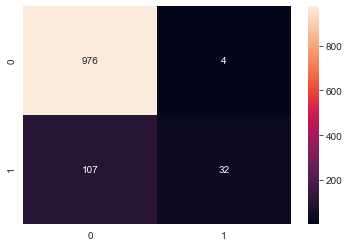

In [81]:
print("Acuracy of KNN classifier for train set: ", accuracy_score(y_train, Knn_classifier.predict(x_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, Knn_classifier.predict(x_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, Knn_classifier.predict(x_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, Knn_classifier.predict(x_train)), annot=True, fmt='d')

# Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=75)


Acuracy of random forest for test set:  89.58333333333334

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       402
           1       0.77      0.51      0.62        78

    accuracy                           0.90       480
   macro avg       0.84      0.74      0.78       480
weighted avg       0.89      0.90      0.89       480


Confusion Matrix for test case : 
 [[390  12]
 [ 38  40]]

Confusion Matrix Heatamp for test case: 


<AxesSubplot:>

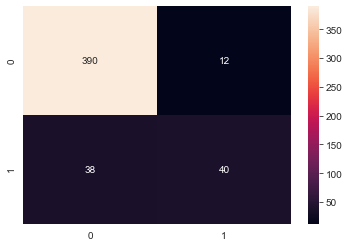

In [59]:
print("\nAcuracy of random forest for test set: ", accuracy_score(y_test, rfc.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, rfc.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, rfc.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test)), annot=True, fmt='d')


Acuracy of random forest for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119


Confusion Matrix for train case : 
 [[980   0]
 [  0 139]]

Confusion Matrix Heatamp for train case: 


<AxesSubplot:>

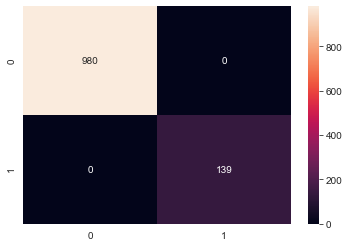

In [83]:
print("\nAcuracy of random forest for train set: ", accuracy_score(y_train, rfc.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, rfc.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, rfc.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, rfc.predict(x_train)), annot=True, fmt='d')

# Desicion tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier()


Acuracy of Decision tree for test set:  85.625

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       402
           1       0.55      0.63      0.59        78

    accuracy                           0.86       480
   macro avg       0.74      0.76      0.75       480
weighted avg       0.86      0.86      0.86       480


Confusion Matrix for test case : 
 [[362  40]
 [ 29  49]]

Confusion Matrix Heatamp for test case: 


<AxesSubplot:>

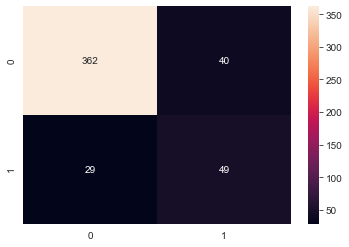

In [62]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, classifier_dt.predict(x_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, classifier_dt.predict(x_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, classifier_dt.predict(x_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, classifier_dt.predict(x_test)), annot=True, fmt='d')


Acuracy of Decision tree for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       139

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119


Confusion Matrix for train case : 
 [[980   0]
 [  0 139]]

Confusion Matrix Heatamp for train case: 


<AxesSubplot:>

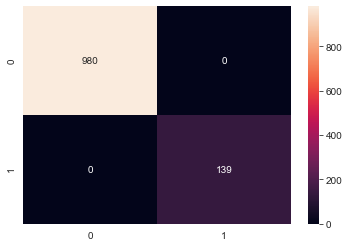

In [85]:
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, classifier_dt.predict(x_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, classifier_dt.predict(x_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, classifier_dt.predict(x_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, classifier_dt.predict(x_train)), annot=True, fmt='d')

# Accuracies of all classifiers

In [87]:
test_accuracy = [accuracy_score(y_test, svm_classifier.predict(x_test))*100,
                accuracy_score(y_test, lr.predict(x_test))*100,
                accuracy_score(y_test, Knn_classifier.predict(x_test))*100,
                accuracy_score(y_test, rfc.predict(x_test))*100,
                accuracy_score(y_test, classifier_dt.predict(x_test))*100]  

In [88]:
train_accuracy = [accuracy_score(y_train, svm_classifier.predict(x_train))*100,
                 accuracy_score(y_train, lr.predict(x_train))*100,
                 accuracy_score(y_train, Knn_classifier.predict(x_train))*100,
                 accuracy_score(y_train, rfc.predict(x_train))*100,
                 accuracy_score(y_train, classifier_dt.predict(x_train))*100]  

In [89]:
Classifier = ['SVM Classifier', 'LogisticRegression', 'KNN Classifier', 'Random forest', 'desicion tree']

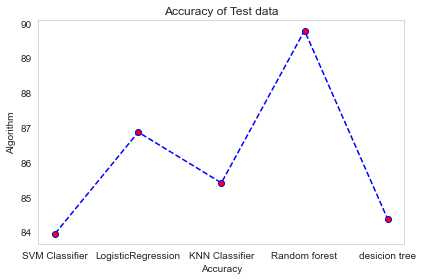

In [90]:
plt.plot(Classifier, test_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Test data')
plt.grid()
plt.tight_layout()

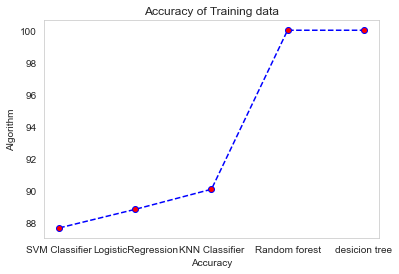

In [92]:
plt.plot(Classifier, train_accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')
plt.ylabel('Algorithm')
plt.xlabel('Accuracy')
plt.title('Accuracy of Training data')
plt.grid()


In [93]:
print('Accuracy for Test Data : \n')
for i in range(5):
    print(Classifier[i], ':', test_accuracy[i])

Accuracy for Test Data : 

SVM Classifier : 83.95833333333333
LogisticRegression : 86.875
KNN Classifier : 85.41666666666666
Random forest : 89.79166666666667
desicion tree : 84.375


In [94]:
print('Accuracy for Traing Data : \n')
for i in range(5):
    print(Classifier[i], ':', train_accuracy[i])

Accuracy for Traing Data : 

SVM Classifier : 87.66756032171583
LogisticRegression : 88.82931188561216
KNN Classifier : 90.0804289544236
Random forest : 100.0
desicion tree : 100.0


# Conclusion

Random forest has maximum accuracy for both test and train set

In [95]:
import pickle
pickle.dump(rfc, open('wine.pkl', 'wb'))